In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import rustroperiods
import P4J

5.85 s ± 127 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


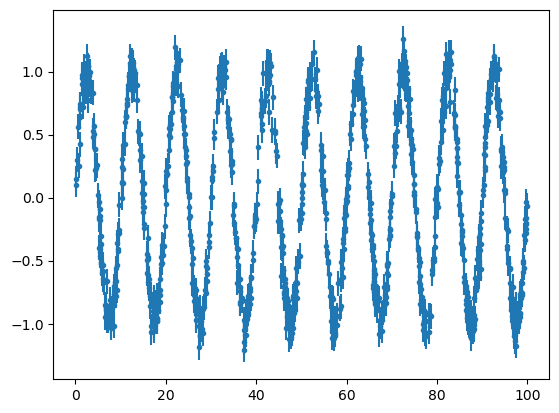

In [2]:
N = 1000
mjd = np.sort(100*np.random.rand(N))
mag = np.sin(2.*np.pi*mjd/10)
err = np.ones_like(mag)*0.1
mag += np.random.randn(len(mag))*err

fig, ax = plt.subplots()
ax.errorbar(mjd, mag, err, fmt='.')

per = P4J.periodogram(method="LKSL")
per.set_data(mjd, mag, err)
%timeit -r3 per.frequency_grid_evaluation(1e-3, 3.0, 1e-4)

mjd = list(mjd)
mag = list(mag)
err = list(err)

In [3]:
%timeit -r3 rustroperiods.single_band_periodogram(mjd, mag, err)

2.431820394
2.308627774
2.504376161
2.37 s ± 93.9 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
2.299977598


2.426977974


(0.0, 0.2)

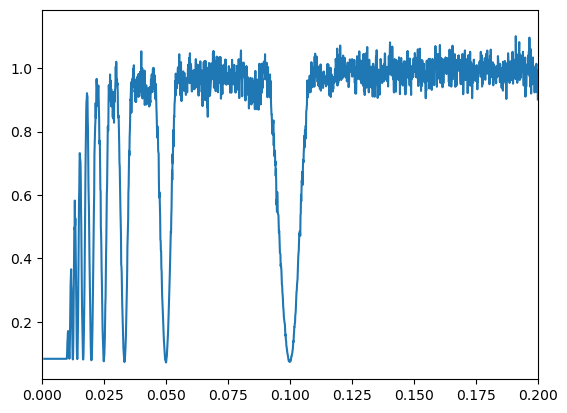

In [5]:
per = rustroperiods.single_band_periodogram(mjd, mag, err)
fig, ax = plt.subplots()
ax.plot(np.arange(1e-3, 3, 1e-4), per)
ax.set_xlim([0, 0.2])